In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
np.random.seed(42)

import seaborn as sns
sns.set_style("white")
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

from hmmlearn import hmm
from sklearn.metrics import accuracy_score

# NASA Bearing Dataset Set 1
- Recording Duration: October 22, 2003 12:06:24 to November 25, 2003 23:39:56
- No. of Files: 2,156
- No. of Channels: 8
- Channel Arrangement: Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4; Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.
- File Recording Interval: Every 10 minutes (except the first 43 files were taken every 5 minutes)
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.

In [3]:
data1 = pd.read_csv('Data/data_rms_bearing_1.csv', header = None, sep=',')
data1.head()

,0,1,2,3,4,5,6,7
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


In [4]:
data1.describe()

,0,1,2,3,4,5,6,7
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.152867,0.153102,0.151212,0.150680,0.153969,0.150338,0.150380,0.150312
std,0.012501,0.012814,0.013307,0.012899,0.013333,0.013063,0.012918,0.012780
min,0.119746,0.117820,0.116974,0.115786,0.119502,0.116332,0.116370,0.117361
25%,0.149213,0.149268,0.147060,0.146744,0.150438,0.146495,0.146565,0.146482
50%,0.151007,0.151351,0.149639,0.148874,0.152409,0.148438,0.148448,0.148342
75%,0.156103,0.156384,0.154420,0.154026,0.158056,0.153872,0.153553,0.153606
max,0.326161,0.325306,0.377078,0.349152,0.322789,0.347876,0.358188,0.320975


# NASA Bearing Dataset Set 2
- Recording Duration: February 12, 2004 10:32:39 to February 19, 2004 06:22:39
- No. of Files: 984
- No. of Channels: 4
- Channel Arrangement: Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.
- File Recording Interval: Every 10 minutes
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.

In [5]:
data2 = pd.read_csv('Data/data_rms_bearing_2.csv', header = None, sep=',')
data2.head()

,0,1,2,3
0,0.085298,0.084981,0.084102,0.084256
1,0.086073,0.086420,0.086052,0.085643
2,0.087299,0.086021,0.084995,0.087011
3,0.086777,0.087066,0.086819,0.087537
4,0.086714,0.086268,0.088115,0.085511


In [6]:
data2.describe()

,0,1,2,3
count,984.000000,984.000000,984.000000,984.000000
mean,0.095427,0.095462,0.095405,0.095439
std,0.027892,0.027912,0.027893,0.027823
min,0.001338,0.001425,0.001624,0.001836
25%,0.083653,0.083570,0.083553,0.083767
50%,0.085521,0.085588,0.085635,0.085679
75%,0.093572,0.094121,0.094041,0.093902
max,0.394807,0.393441,0.396800,0.395304


# Add Index Time

## Set 1

In [7]:
# create list minutes
minutes = []
start = 0
for t in range(len(data1)):
    # Every 10 minutes (except the first 43 files were taken every 5 minutes) 
    minutes.append(start)
    if t <= 43: 
        start += 5
    else:
        start += 10

In [8]:
# add into index dataframe
se = pd.Series(minutes)
data1.index = se.values
data1.index.name = 'Time'
data1.head()

,0,1,2,3,4,5,6,7
Time,,,,,,,,
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
5,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
10,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
15,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
20,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


## Set 2

In [9]:
# create list minutes
minutes = []
start = 0
for t in range(len(data2)):
    # Every 10 minutes 
    minutes.append(start)
    start += 10

In [10]:
# add into index dataframe
se = pd.Series(minutes)
data2.index = se.values
data2.index.name = 'Time'
data2.head()

,0,1,2,3
Time,,,,
0,0.085298,0.084981,0.084102,0.084256
10,0.086073,0.086420,0.086052,0.085643
20,0.087299,0.086021,0.084995,0.087011
30,0.086777,0.087066,0.086819,0.087537
40,0.086714,0.086268,0.088115,0.085511


# Draw Plot

## Set 1

[Text(0.5,0,'Time')]

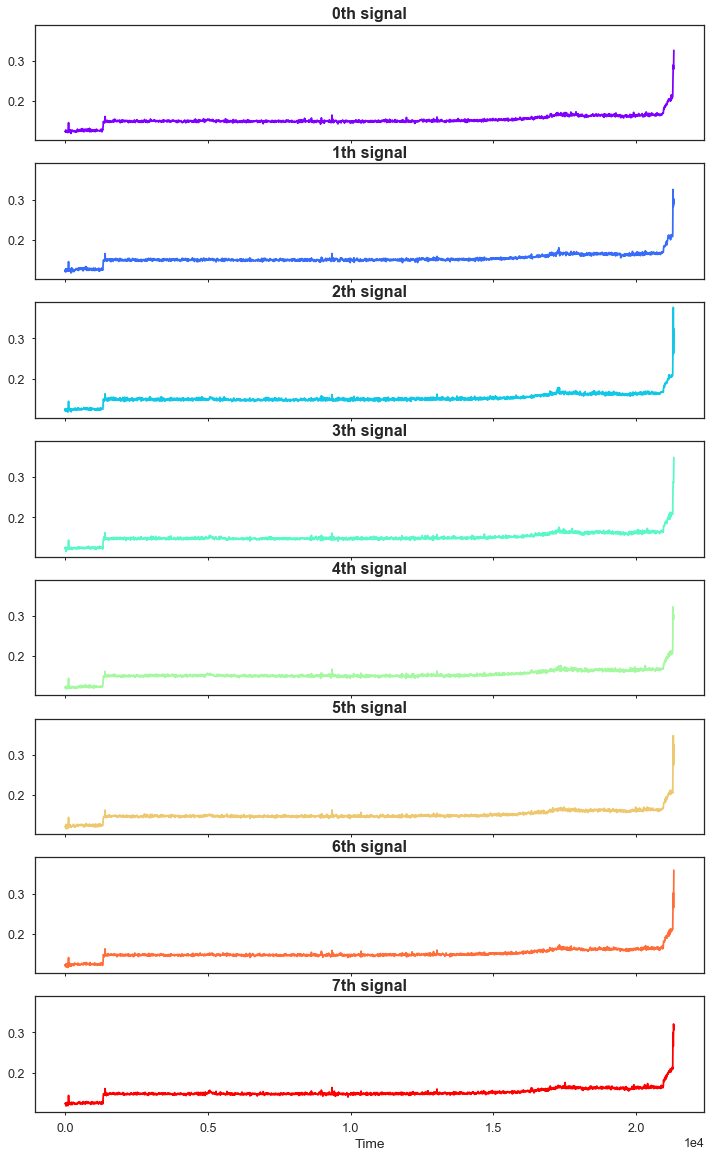

In [11]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(8, sharex=True, sharey=True, figsize=(12,20))
colors = cm.rainbow(np.linspace(0, 7))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data1.index == i
    ax.plot(data1.index,
            data1[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time')

## Set 2

[Text(0.5,0,'Time')]

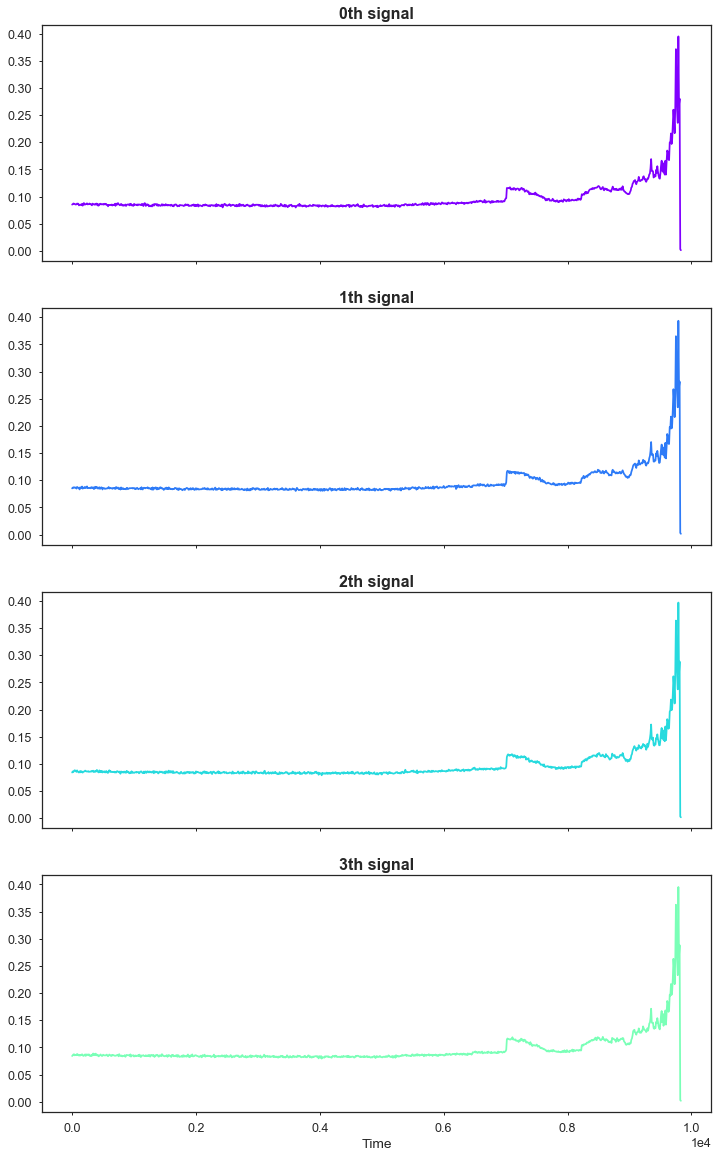

In [12]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(12,20))
colors = cm.rainbow(np.linspace(0, 8))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data2.index == i
    ax.plot(data2.index,
            data2[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time')

# Train GMMHMM Model with HMMLearn 

In [13]:
list_model = []
for channel in data1:
    model = hmm.GMMHMM(n_components=3, n_mix=2, covariance_type="full", n_iter=1000, random_state=42, tol=1e-5, verbose=True)
    model.fit(data1[channel].values.reshape(-1, 1))
    logprob = model.score(data1[channel].values.reshape(-1, 1))
    list_model.append([model, logprob])

         1        4666.1368             +nan
         2        6460.7413       +1794.6046
         3        6990.1551        +529.4138
         4        7261.4450        +271.2899
         5        7742.2772        +480.8322
         6        8522.2066        +779.9294
         7        9151.8987        +629.6921
         8        9319.8577        +167.9590
         9        9332.2959         +12.4382
        10        9334.7286          +2.4327
        11        9337.0036          +2.2750
        12        9340.3349          +3.3314
        13        9346.4186          +6.0837
        14        9358.5970         +12.1785
        15        9397.8525         +39.2555
        16        9544.9234        +147.0708
        17        9670.5235        +125.6001
        18        9685.1721         +14.6486
        19        9688.4819          +3.3097
        20        9689.3747          +0.8929
        21        9689.8394          +0.4647
        22        9690.1109          +0.2715
        23

       190        9699.4122          +0.0004
       191        9699.4126          +0.0004
       192        9699.4130          +0.0004
       193        9699.4133          +0.0003
       194        9699.4136          +0.0003
       195        9699.4139          +0.0003
       196        9699.4142          +0.0003
       197        9699.4145          +0.0003
       198        9699.4148          +0.0003
       199        9699.4151          +0.0003
       200        9699.4154          +0.0003
       201        9699.4156          +0.0003
       202        9699.4159          +0.0002
       203        9699.4161          +0.0002
       204        9699.4163          +0.0002
       205        9699.4165          +0.0002
       206        9699.4167          +0.0002
       207        9699.4170          +0.0002
       208        9699.4171          +0.0002
       209        9699.4173          +0.0002
       210        9699.4175          +0.0002
       211        9699.4177          +0.0002
       212

       107        9289.0885          +0.0009
       108        9289.0893          +0.0007
       109        9289.0900          +0.0007
       110        9289.0905          +0.0006
       111        9289.0911          +0.0005
       112        9289.0915          +0.0005
       113        9289.0919          +0.0004
       114        9289.0923          +0.0004
       115        9289.0926          +0.0003
       116        9289.0929          +0.0003
       117        9289.0931          +0.0003
       118        9289.0933          +0.0002
       119        9289.0935          +0.0002
       120        9289.0937          +0.0002
       121        9289.0939          +0.0002
       122        9289.0941          +0.0002
       123        9289.0942          +0.0001
       124        9289.0943          +0.0001
       125        9289.0944          +0.0001
       126        9289.0946          +0.0001
       127        9289.0947          +0.0001
       128        9289.0948          +0.0001
       129

       301        9289.1033          +0.0000
       302        9289.1034          +0.0000
       303        9289.1034          +0.0000
       304        9289.1035          +0.0000
       305        9289.1035          +0.0000
       306        9289.1036          +0.0000
       307        9289.1036          +0.0000
       308        9289.1036          +0.0000
       309        9289.1037          +0.0000
       310        9289.1037          +0.0000
       311        9289.1038          +0.0000
       312        9289.1038          +0.0000
       313        9289.1038          +0.0000
       314        9289.1039          +0.0000
       315        9289.1039          +0.0000
       316        9289.1040          +0.0000
       317        9289.1040          +0.0000
       318        9289.1040          +0.0000
       319        9289.1041          +0.0000
       320        9289.1041          +0.0000
       321        9289.1042          +0.0000
       322        9289.1042          +0.0000
       323

       493        9289.1100          +0.0000
       494        9289.1100          +0.0000
       495        9289.1100          +0.0000
       496        9289.1101          +0.0000
       497        9289.1101          +0.0000
       498        9289.1101          +0.0000
       499        9289.1102          +0.0000
       500        9289.1102          +0.0000
       501        9289.1102          +0.0000
       502        9289.1102          +0.0000
       503        9289.1103          +0.0000
       504        9289.1103          +0.0000
       505        9289.1103          +0.0000
       506        9289.1104          +0.0000
       507        9289.1104          +0.0000
       508        9289.1104          +0.0000
       509        9289.1104          +0.0000
       510        9289.1105          +0.0000
       511        9289.1105          +0.0000
       512        9289.1105          +0.0000
       513        9289.1105          +0.0000
       514        9289.1106          +0.0000
       515

       700        9289.1147          +0.0000
       701        9289.1147          +0.0000
       702        9289.1147          +0.0000
       703        9289.1147          +0.0000
       704        9289.1147          +0.0000
       705        9289.1148          +0.0000
       706        9289.1148          +0.0000
       707        9289.1148          +0.0000
       708        9289.1148          +0.0000
       709        9289.1148          +0.0000
       710        9289.1148          +0.0000
       711        9289.1149          +0.0000
       712        9289.1149          +0.0000
       713        9289.1149          +0.0000
       714        9289.1149          +0.0000
       715        9289.1149          +0.0000
       716        9289.1149          +0.0000
       717        9289.1150          +0.0000
       718        9289.1150          +0.0000
       719        9289.1150          +0.0000
       720        9289.1150          +0.0000
       721        9289.1150          +0.0000
       722

       903        9289.1174          +0.0000
       904        9289.1174          +0.0000
       905        9289.1174          +0.0000
       906        9289.1174          +0.0000
       907        9289.1174          +0.0000
         1        4231.4509             +nan
         2        6235.2273       +2003.7765
         3        6942.6330        +707.4057
         4        7235.6916        +293.0586
         5        7620.7103        +385.0186
         6        8192.8445        +572.1342
         7        8901.2957        +708.4512
         8        9065.3679        +164.0722
         9        9082.4590         +17.0911
        10        9086.0413          +3.5823
        11        9089.6621          +3.6208
        12        9093.9668          +4.3047
        13        9099.8413          +5.8744
        14        9111.5736         +11.7323
        15        9148.8621         +37.2885
        16        9269.6119        +120.7498
        17        9401.3612        +131.7493
        18

       207        9447.4093          +0.0003
       208        9447.4096          +0.0003
       209        9447.4099          +0.0003
       210        9447.4102          +0.0003
       211        9447.4105          +0.0003
       212        9447.4108          +0.0003
       213        9447.4110          +0.0002
       214        9447.4113          +0.0002
       215        9447.4115          +0.0002
       216        9447.4117          +0.0002
       217        9447.4119          +0.0002
       218        9447.4121          +0.0002
       219        9447.4123          +0.0002
       220        9447.4125          +0.0002
       221        9447.4126          +0.0002
       222        9447.4128          +0.0002
       223        9447.4129          +0.0002
       224        9447.4131          +0.0001
       225        9447.4132          +0.0001
       226        9447.4133          +0.0001
       227        9447.4135          +0.0001
       228        9447.4136          +0.0001
       229

       117        9580.5447          +0.0049
       118        9580.5494          +0.0048
       119        9580.5541          +0.0046
       120        9580.5586          +0.0045
       121        9580.5630          +0.0044
       122        9580.5674          +0.0043
       123        9580.5716          +0.0042
       124        9580.5757          +0.0041
       125        9580.5798          +0.0040
       126        9580.5837          +0.0040
       127        9580.5876          +0.0039
       128        9580.5914          +0.0038
       129        9580.5951          +0.0037
       130        9580.5987          +0.0036
       131        9580.6023          +0.0035
       132        9580.6057          +0.0035
       133        9580.6091          +0.0034
       134        9580.6125          +0.0033
       135        9580.6157          +0.0033
       136        9580.6189          +0.0032
       137        9580.6221          +0.0031
       138        9580.6251          +0.0031
       139

       304        9580.7719          +0.0001
       305        9580.7720          +0.0001
       306        9580.7721          +0.0001
       307        9580.7722          +0.0001
       308        9580.7722          +0.0001
       309        9580.7723          +0.0001
       310        9580.7724          +0.0001
       311        9580.7725          +0.0001
       312        9580.7726          +0.0001
       313        9580.7727          +0.0001
       314        9580.7728          +0.0001
       315        9580.7728          +0.0001
       316        9580.7729          +0.0001
       317        9580.7730          +0.0001
       318        9580.7731          +0.0001
       319        9580.7731          +0.0001
       320        9580.7732          +0.0001
       321        9580.7733          +0.0001
       322        9580.7734          +0.0001
       323        9580.7734          +0.0001
       324        9580.7735          +0.0001
       325        9580.7736          +0.0001
       326

        87        9302.2937          +0.0123
        88        9302.3056          +0.0119
        89        9302.3171          +0.0115
        90        9302.3283          +0.0112
        91        9302.3392          +0.0109
        92        9302.3497          +0.0105
        93        9302.3599          +0.0102
        94        9302.3698          +0.0099
        95        9302.3793          +0.0096
        96        9302.3886          +0.0093
        97        9302.3976          +0.0090
        98        9302.4063          +0.0087
        99        9302.4148          +0.0084
       100        9302.4230          +0.0082
       101        9302.4309          +0.0079
       102        9302.4386          +0.0077
       103        9302.4460          +0.0074
       104        9302.4532          +0.0072
       105        9302.4602          +0.0070
       106        9302.4669          +0.0067
       107        9302.4734          +0.0065
       108        9302.4798          +0.0063
       109

       291        9302.6636          +0.0000
       292        9302.6636          +0.0000
       293        9302.6637          +0.0000
       294        9302.6637          +0.0000
         1        4247.8549             +nan
         2        6266.2091       +2018.3543
         3        6989.3142        +723.1050
         4        7299.6872        +310.3730
         5        7762.8043        +463.1172
         6        8479.8741        +717.0698
         7        9241.8036        +761.9295
         8        9345.5323        +103.7287
         9        9347.8893          +2.3570
        10        9349.2861          +1.3968
        11        9350.2409          +0.9548
        12        9350.9026          +0.6617
        13        9351.3835          +0.4809
        14        9351.7672          +0.3837
        15        9352.1150          +0.3478
        16        9352.4693          +0.3543
        17        9352.8574          +0.3881
        18        9353.3017          +0.4443
        19

       194        9370.4902          +0.0011
       195        9370.4913          +0.0011
       196        9370.4924          +0.0011
       197        9370.4935          +0.0011
       198        9370.4946          +0.0011
       199        9370.4957          +0.0011
       200        9370.4968          +0.0011
       201        9370.4978          +0.0011
       202        9370.4989          +0.0011
       203        9370.5000          +0.0011
       204        9370.5011          +0.0011
       205        9370.5021          +0.0011
       206        9370.5032          +0.0011
       207        9370.5042          +0.0011
       208        9370.5053          +0.0011
       209        9370.5063          +0.0011
       210        9370.5074          +0.0010
       211        9370.5084          +0.0010
       212        9370.5095          +0.0010
       213        9370.5105          +0.0010
       214        9370.5115          +0.0010
       215        9370.5126          +0.0010
       216

       386        9370.6510          +0.0006
       387        9370.6517          +0.0006
       388        9370.6523          +0.0006
       389        9370.6530          +0.0006
       390        9370.6536          +0.0006
       391        9370.6542          +0.0006
       392        9370.6549          +0.0006
       393        9370.6555          +0.0006
       394        9370.6561          +0.0006
       395        9370.6568          +0.0006
       396        9370.6574          +0.0006
       397        9370.6580          +0.0006
       398        9370.6587          +0.0006
       399        9370.6593          +0.0006
       400        9370.6599          +0.0006
       401        9370.6605          +0.0006
       402        9370.6612          +0.0006
       403        9370.6618          +0.0006
       404        9370.6624          +0.0006
       405        9370.6630          +0.0006
       406        9370.6636          +0.0006
       407        9370.6642          +0.0006
       408

       571        9370.7475          +0.0004
       572        9370.7480          +0.0004
       573        9370.7484          +0.0004
       574        9370.7488          +0.0004
       575        9370.7492          +0.0004
       576        9370.7496          +0.0004
       577        9370.7500          +0.0004
       578        9370.7504          +0.0004
       579        9370.7508          +0.0004
       580        9370.7512          +0.0004
       581        9370.7516          +0.0004
       582        9370.7520          +0.0004
       583        9370.7524          +0.0004
       584        9370.7528          +0.0004
       585        9370.7532          +0.0004
       586        9370.7536          +0.0004
       587        9370.7540          +0.0004
       588        9370.7544          +0.0004
       589        9370.7548          +0.0004
       590        9370.7551          +0.0004
       591        9370.7555          +0.0004
       592        9370.7559          +0.0004
       593

       773        9370.8090          +0.0002
       774        9370.8092          +0.0002
       775        9370.8094          +0.0002
       776        9370.8096          +0.0002
       777        9370.8098          +0.0002
       778        9370.8101          +0.0002
       779        9370.8103          +0.0002
       780        9370.8105          +0.0002
       781        9370.8107          +0.0002
       782        9370.8109          +0.0002
       783        9370.8111          +0.0002
       784        9370.8113          +0.0002
       785        9370.8115          +0.0002
       786        9370.8117          +0.0002
       787        9370.8118          +0.0002
       788        9370.8120          +0.0002
       789        9370.8122          +0.0002
       790        9370.8124          +0.0002
       791        9370.8126          +0.0002
       792        9370.8128          +0.0002
       793        9370.8130          +0.0002
       794        9370.8132          +0.0002
       795

       965        9370.8358          +0.0001
       966        9370.8359          +0.0001
       967        9370.8360          +0.0001
       968        9370.8360          +0.0001
       969        9370.8361          +0.0001
       970        9370.8362          +0.0001
       971        9370.8363          +0.0001
       972        9370.8364          +0.0001
       973        9370.8365          +0.0001
       974        9370.8365          +0.0001
       975        9370.8366          +0.0001
       976        9370.8367          +0.0001
       977        9370.8368          +0.0001
       978        9370.8369          +0.0001
       979        9370.8369          +0.0001
       980        9370.8370          +0.0001
       981        9370.8371          +0.0001
       982        9370.8372          +0.0001
       983        9370.8372          +0.0001
       984        9370.8373          +0.0001
       985        9370.8374          +0.0001
       986        9370.8375          +0.0001
       987

       174        9702.2116          +0.0006
       175        9702.2122          +0.0006
       176        9702.2127          +0.0006
       177        9702.2133          +0.0005
       178        9702.2138          +0.0005
       179        9702.2143          +0.0005
       180        9702.2148          +0.0005
       181        9702.2152          +0.0005
       182        9702.2157          +0.0004
       183        9702.2161          +0.0004
       184        9702.2165          +0.0004
       185        9702.2169          +0.0004
       186        9702.2173          +0.0004
       187        9702.2176          +0.0004
       188        9702.2180          +0.0004
       189        9702.2183          +0.0003
       190        9702.2187          +0.0003
       191        9702.2190          +0.0003
       192        9702.2193          +0.0003
       193        9702.2196          +0.0003
       194        9702.2199          +0.0003
       195        9702.2201          +0.0003
       196

        57        9374.6789          +0.0211
        58        9374.6990          +0.0201
        59        9374.7181          +0.0191
        60        9374.7364          +0.0182
        61        9374.7537          +0.0174
        62        9374.7702          +0.0165
        63        9374.7860          +0.0157
        64        9374.8010          +0.0150
        65        9374.8153          +0.0143
        66        9374.8288          +0.0136
        67        9374.8418          +0.0129
        68        9374.8541          +0.0123
        69        9374.8658          +0.0117
        70        9374.8770          +0.0112
        71        9374.8876          +0.0106
        72        9374.8978          +0.0101
        73        9374.9074          +0.0096
        74        9374.9165          +0.0092
        75        9374.9253          +0.0087
        76        9374.9336          +0.0083
        77        9374.9415          +0.0079
        78        9374.9490          +0.0075
        79

In [14]:
# mencari logprob tertinggi
for index, model in enumerate(list_model):
    model, logprob = model[0], model[1]
    print("logprob data ", index, ":", logprob)

logprob data  0 : 9699.422159410267
logprob data  1 : 9289.117458376531
logprob data  2 : 9447.41573278614
logprob data  3 : 9580.77597299297
logprob data  4 : 9302.663676371634
logprob data  5 : 9370.838548303924
logprob data  6 : 9702.228404886277
logprob data  7 : 9375.093275616844


In [15]:
# best models with the highest logprob
best_model = list_model[6]
model, logprob = best_model[0], best_model[1]

In [16]:
# log probability
logprob

9702.228404886277

In [17]:
# start probability
model.startprob_

array([0., 1., 0.])

In [18]:
# transition matrix
model.transmat_

array([[9.99318893e-001, 0.00000000e+000, 6.81107261e-004],
       [5.20648446e-003, 9.94793516e-001, 0.00000000e+000],
       [7.74469614e-196, 2.02136222e-003, 9.97978638e-001]])

In [19]:
# mixture's weight
model.weights_

array([[0.67687941, 0.32312059],
       [0.79177442, 0.20822558],
       [0.7045374 , 0.2954626 ]])

In [20]:
# means
model.means_

array([[[0.14740636],
        [0.14930528]],

       [[0.12399797],
        [0.20232225]],

       [[0.16087779],
        [0.16236029]]])

In [21]:
# covars
model.covars_

array([[[[2.46614260e-06]],

        [[7.97309681e-06]]],


       [[[4.76396162e-06]],

        [[1.56421879e-03]]],


       [[[1.66590427e-05]],

        [[2.71727455e-06]]]])

Menggunakan contoh pada tobon menggunakan bearing 1 test 1

In [50]:
# best models with the highest logprob
tobon_model = list_model[1]
model_tobon, logprob_tobon = tobon_model[0], tobon_model[1]

In [54]:
# log probability
print(logprob_tobon)

# start probability
print(model_tobon.startprob_)

# transition matrix
print(model_tobon.transmat_)

# mixture's weight
print(model_tobon.weights_)

# means
print(model_tobon.means_)

# covars
print(model_tobon.covars_)

9289.117458376531
[0. 1. 0.]
[[0.99793478 0.         0.00206522]
 [0.00519757 0.99480243 0.        ]
 [0.00392643 0.00196397 0.9941096 ]]
[[0.75967608 0.24032392]
 [0.97932912 0.02067088]
 [0.37398106 0.62601894]]
[[[0.14999812]
  [0.15301288]]

 [[0.13937435]
  [0.29987481]]

 [[0.16593079]
  [0.16259188]]]
[[[[3.37788928e-06]]

  [[3.49060020e-06]]]


 [[[7.86038699e-04]]

  [[2.67916523e-04]]]


 [[[3.33523771e-06]]

  [[1.76202554e-05]]]]


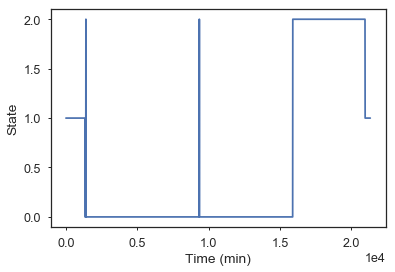

In [24]:
plt.plot(data1.index, model_tobon.predict(data1[1].values.reshape(-1, 1)))
plt.xlabel('Time (min)')
plt.ylabel('State')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

In [44]:
duration = [0, 0, 0]

state_pred = model_tobon.predict(data1[1].values.reshape(-1, 1))
time = data1.index.values

for index, state in enumerate(state_pred):
    if index < len(state_pred)-1:
        if state == 0:
            duration[0] = duration[0] + (time[index+1] - time[index])
        elif state == 1:
            duration[1] = duration[1] + (time[index+1] - time[index])
        elif state == 2:
            duration[2] = duration[2] + (time[index+1] - time[index])
    else:
        if state == 0:
            duration[0] = duration[0] + (time[index] - time[index-1])
        elif state == 1:
            duration[1] = duration[1] + (time[index] - time[index-1])
        elif state == 2:
            duration[2] = duration[2] + (time[index] - time[index-1])
print(duration)

[14540, 1710, 5090]


In [45]:
from collections import Counter

In [46]:
cnt = Counter()
for state in state_pred:
    cnt[state] += 1
print(cnt)

Counter({0: 1454, 2: 509, 1: 193})


In [47]:
mean_duration = [duration[0]/cnt[0], duration[1]/cnt[1], duration[2]/cnt[2]]
mean_duration

[10.0, 8.860103626943005, 10.0]